# Unsupervised Learning : KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.dpi']=250
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("penguins.csv")
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


In [3]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.isnull().sum()

culmen_length_mm     1
culmen_depth_mm      1
flipper_length_mm    1
body_mass_g          1
sex                  8
dtype: int64

## Handling missing values

In [7]:
si = SimpleImputer(strategy='median')
df.iloc[:,:-1] = si.fit_transform(df.iloc[:,:-1])
df['sex']=df['sex'].fillna(df['sex'].mode()[0])

df                 

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10,18.7,181.0,3750.0,MALE
1,39.50,17.4,186.0,3800.0,FEMALE
2,40.30,18.0,195.0,3250.0,FEMALE
3,44.45,17.3,197.0,4050.0,MALE
4,36.70,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
338,47.20,13.7,214.0,4925.0,FEMALE
340,46.80,14.3,215.0,4850.0,FEMALE
341,50.40,15.7,222.0,5750.0,MALE
342,45.20,14.8,212.0,5200.0,FEMALE


In [8]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

<Axes: >

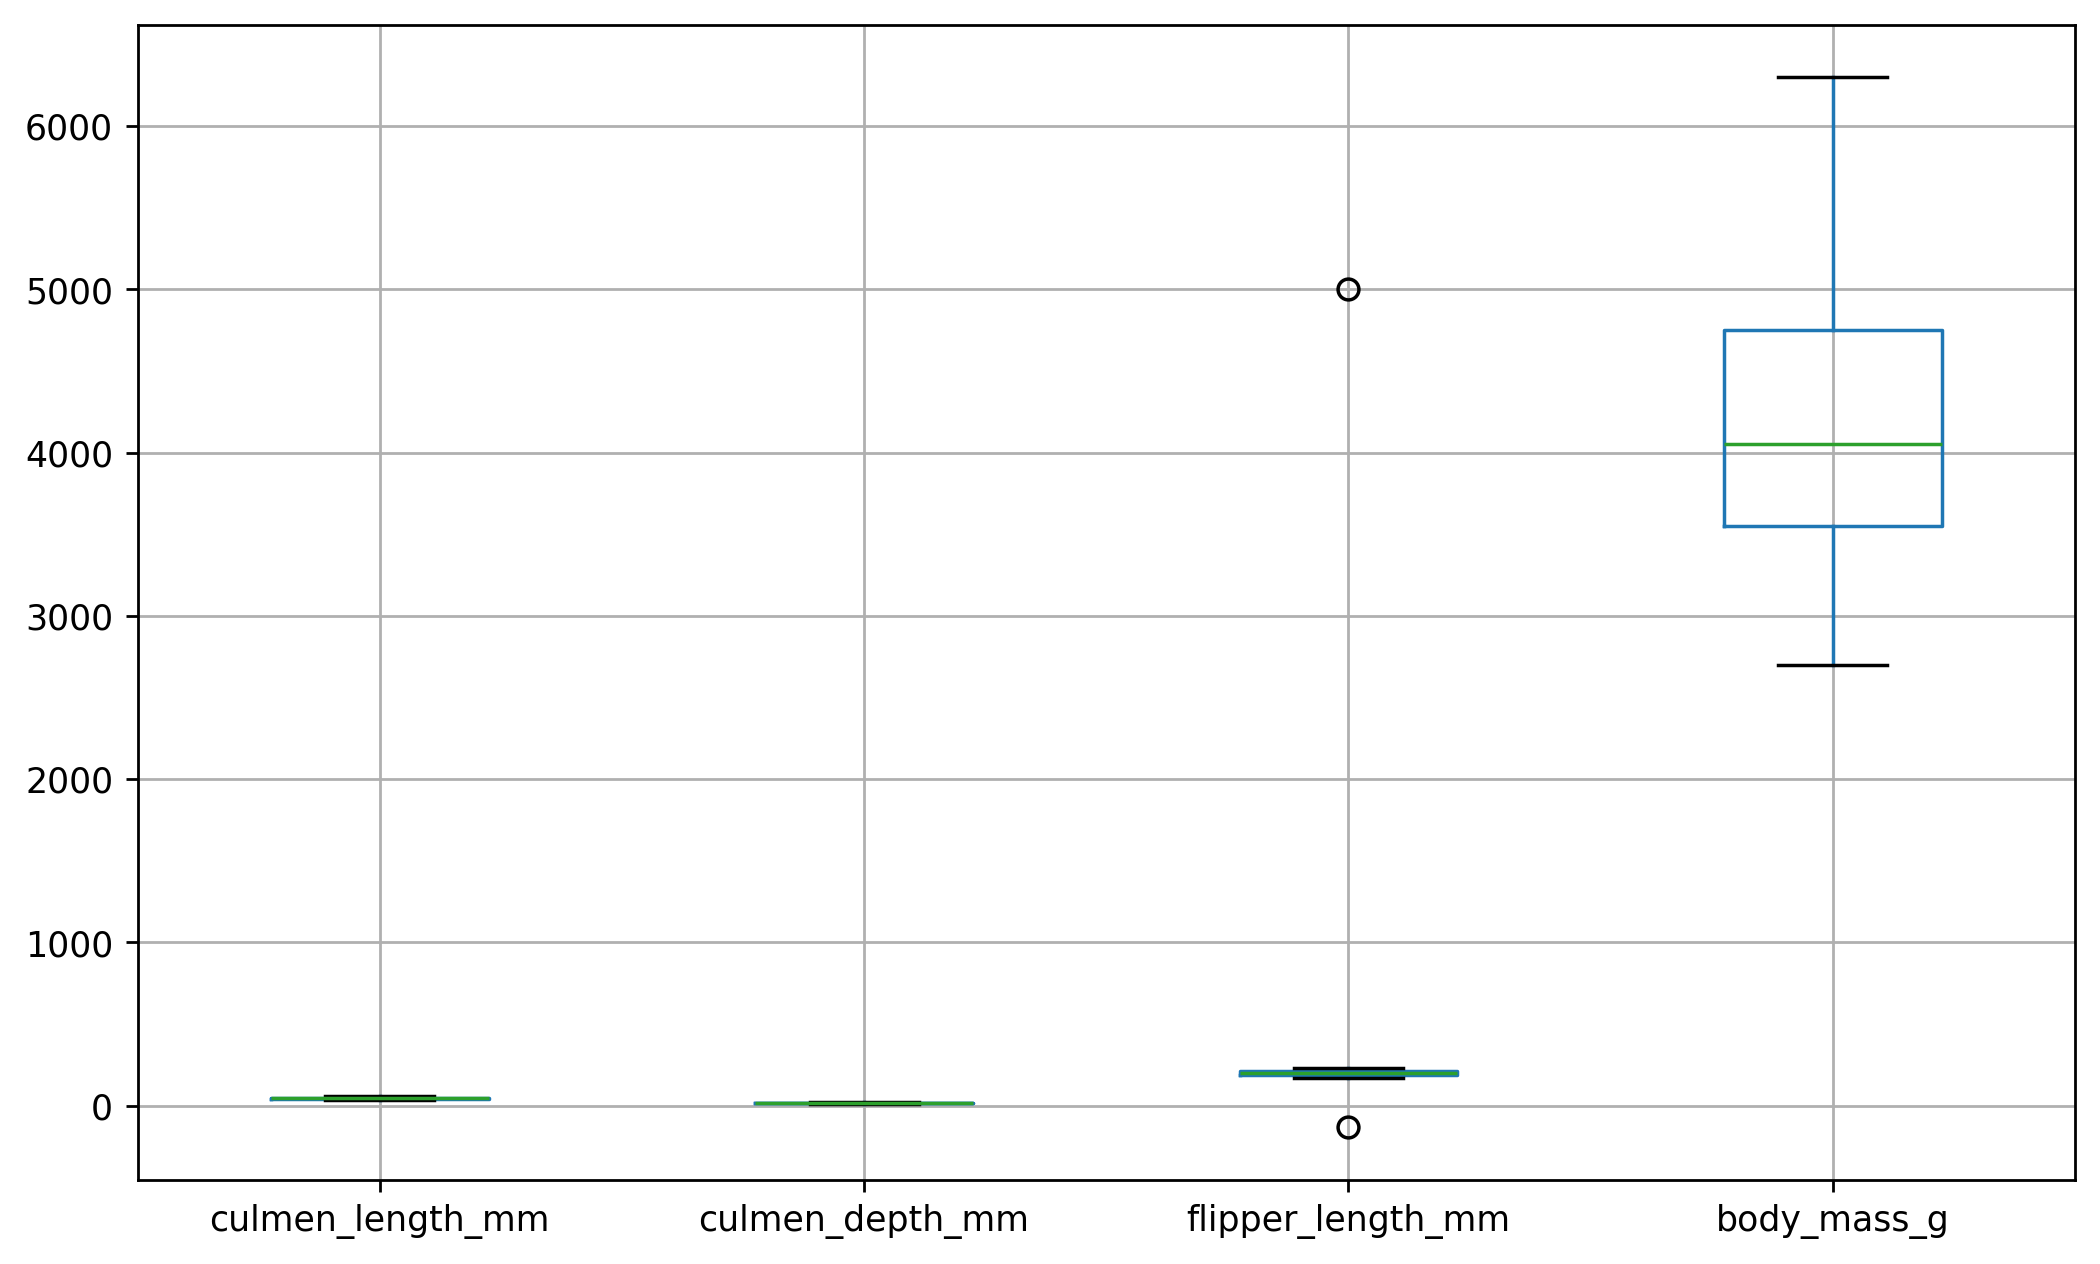

In [9]:
df.boxplot()

array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

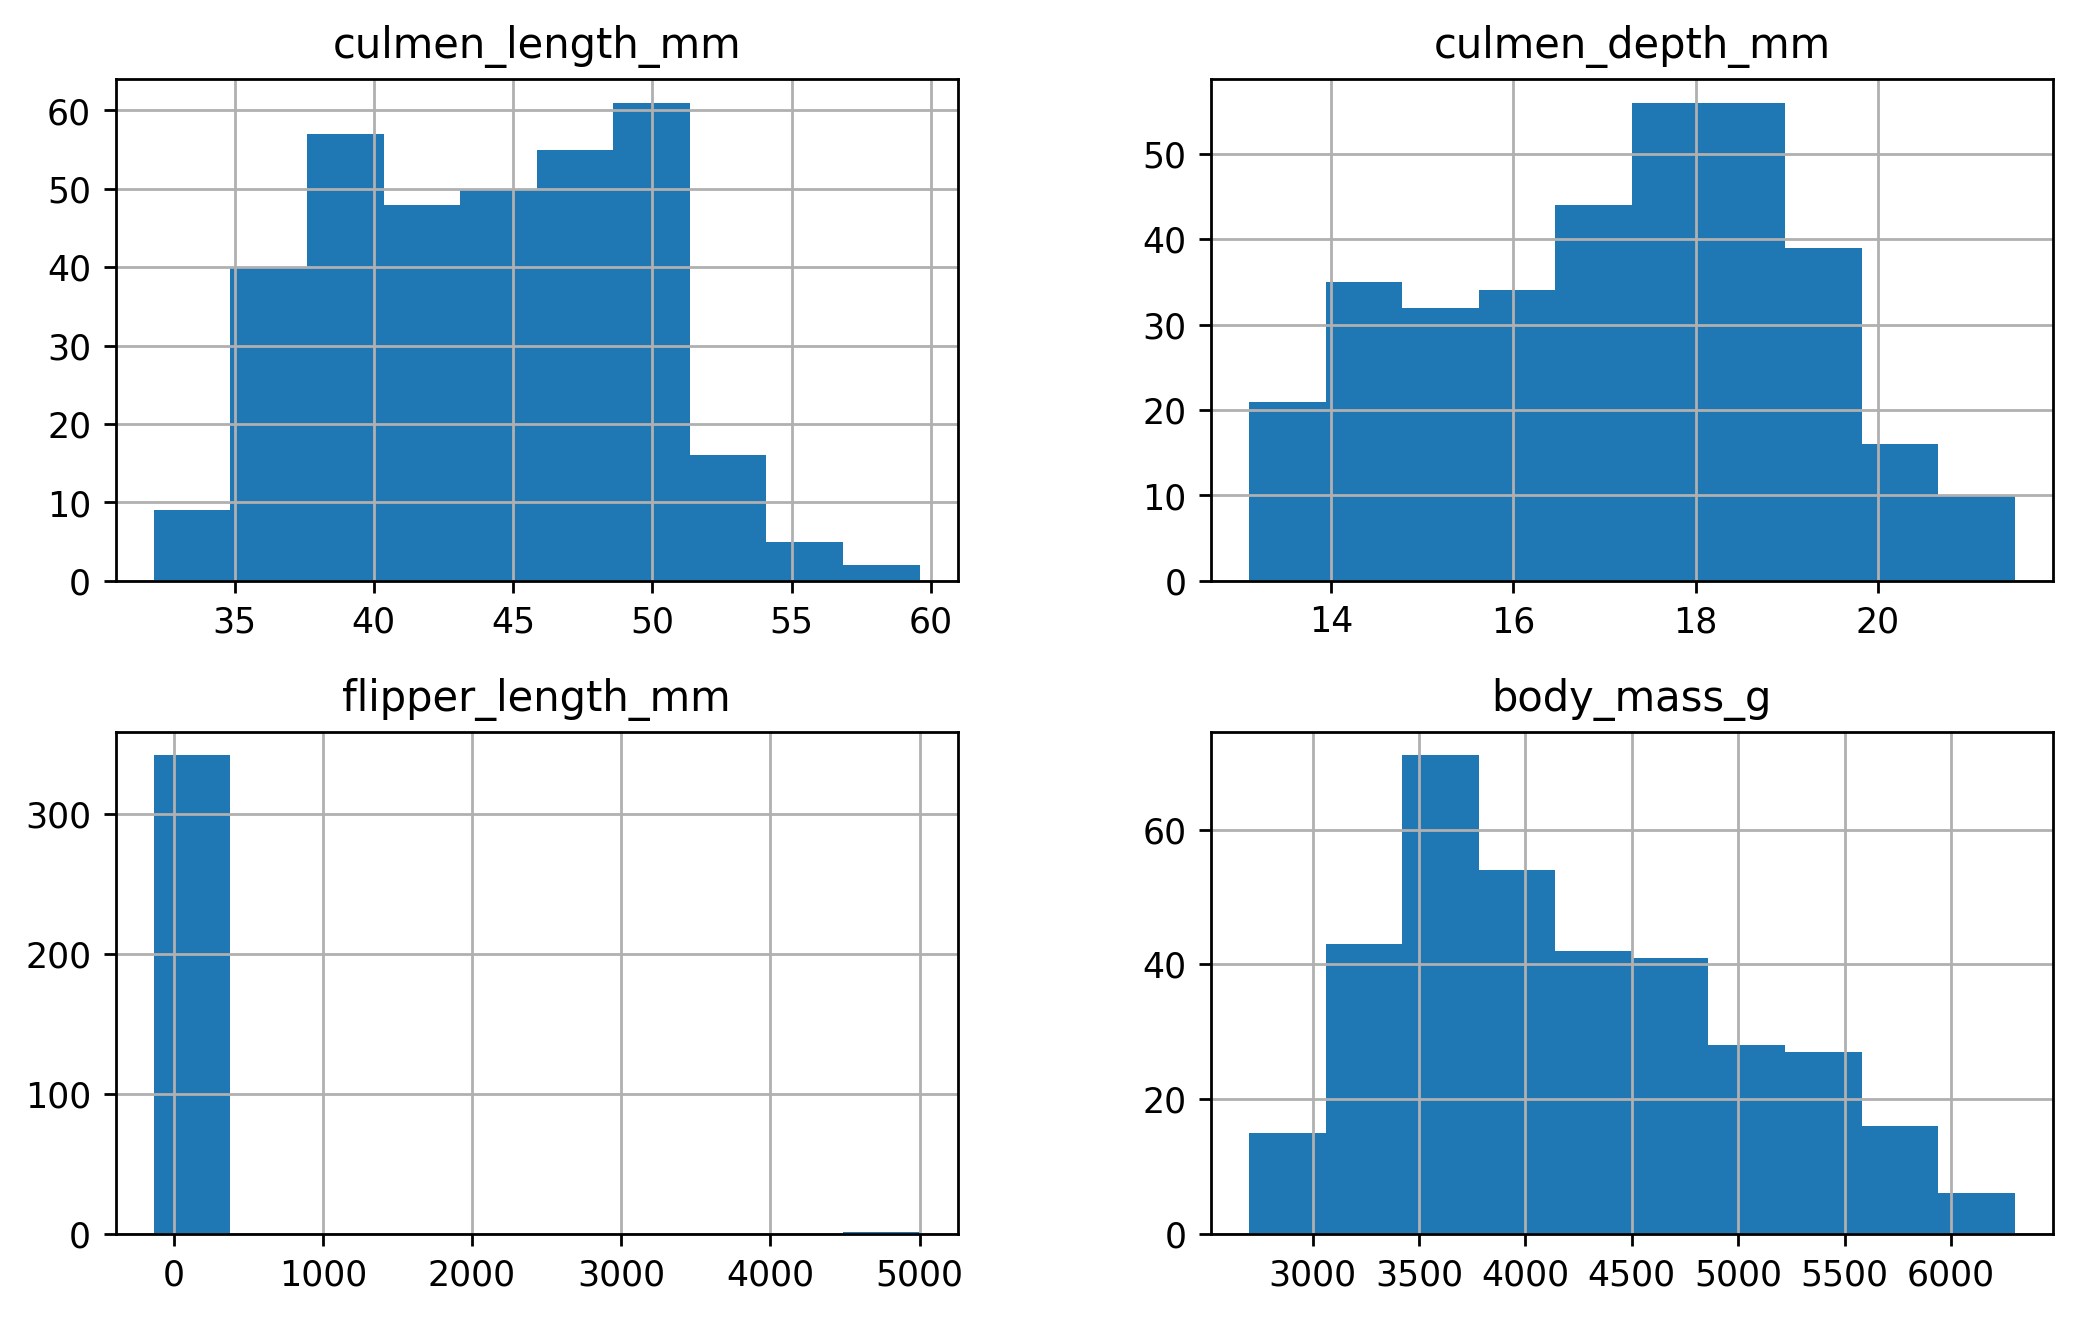

In [10]:
df.hist()

## Treatment for outliers

In [11]:
def capping(data,columns):
    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3 -q1
        lower = q1 - (1.5*iqr)
        upper = q3 + (1.5*iqr)

        data[col] = np.where(data[col]>upper,upper,np.where(data[col]<lower,lower,data[col]))

In [12]:
capping(df,["flipper_length_mm"])

<Axes: >

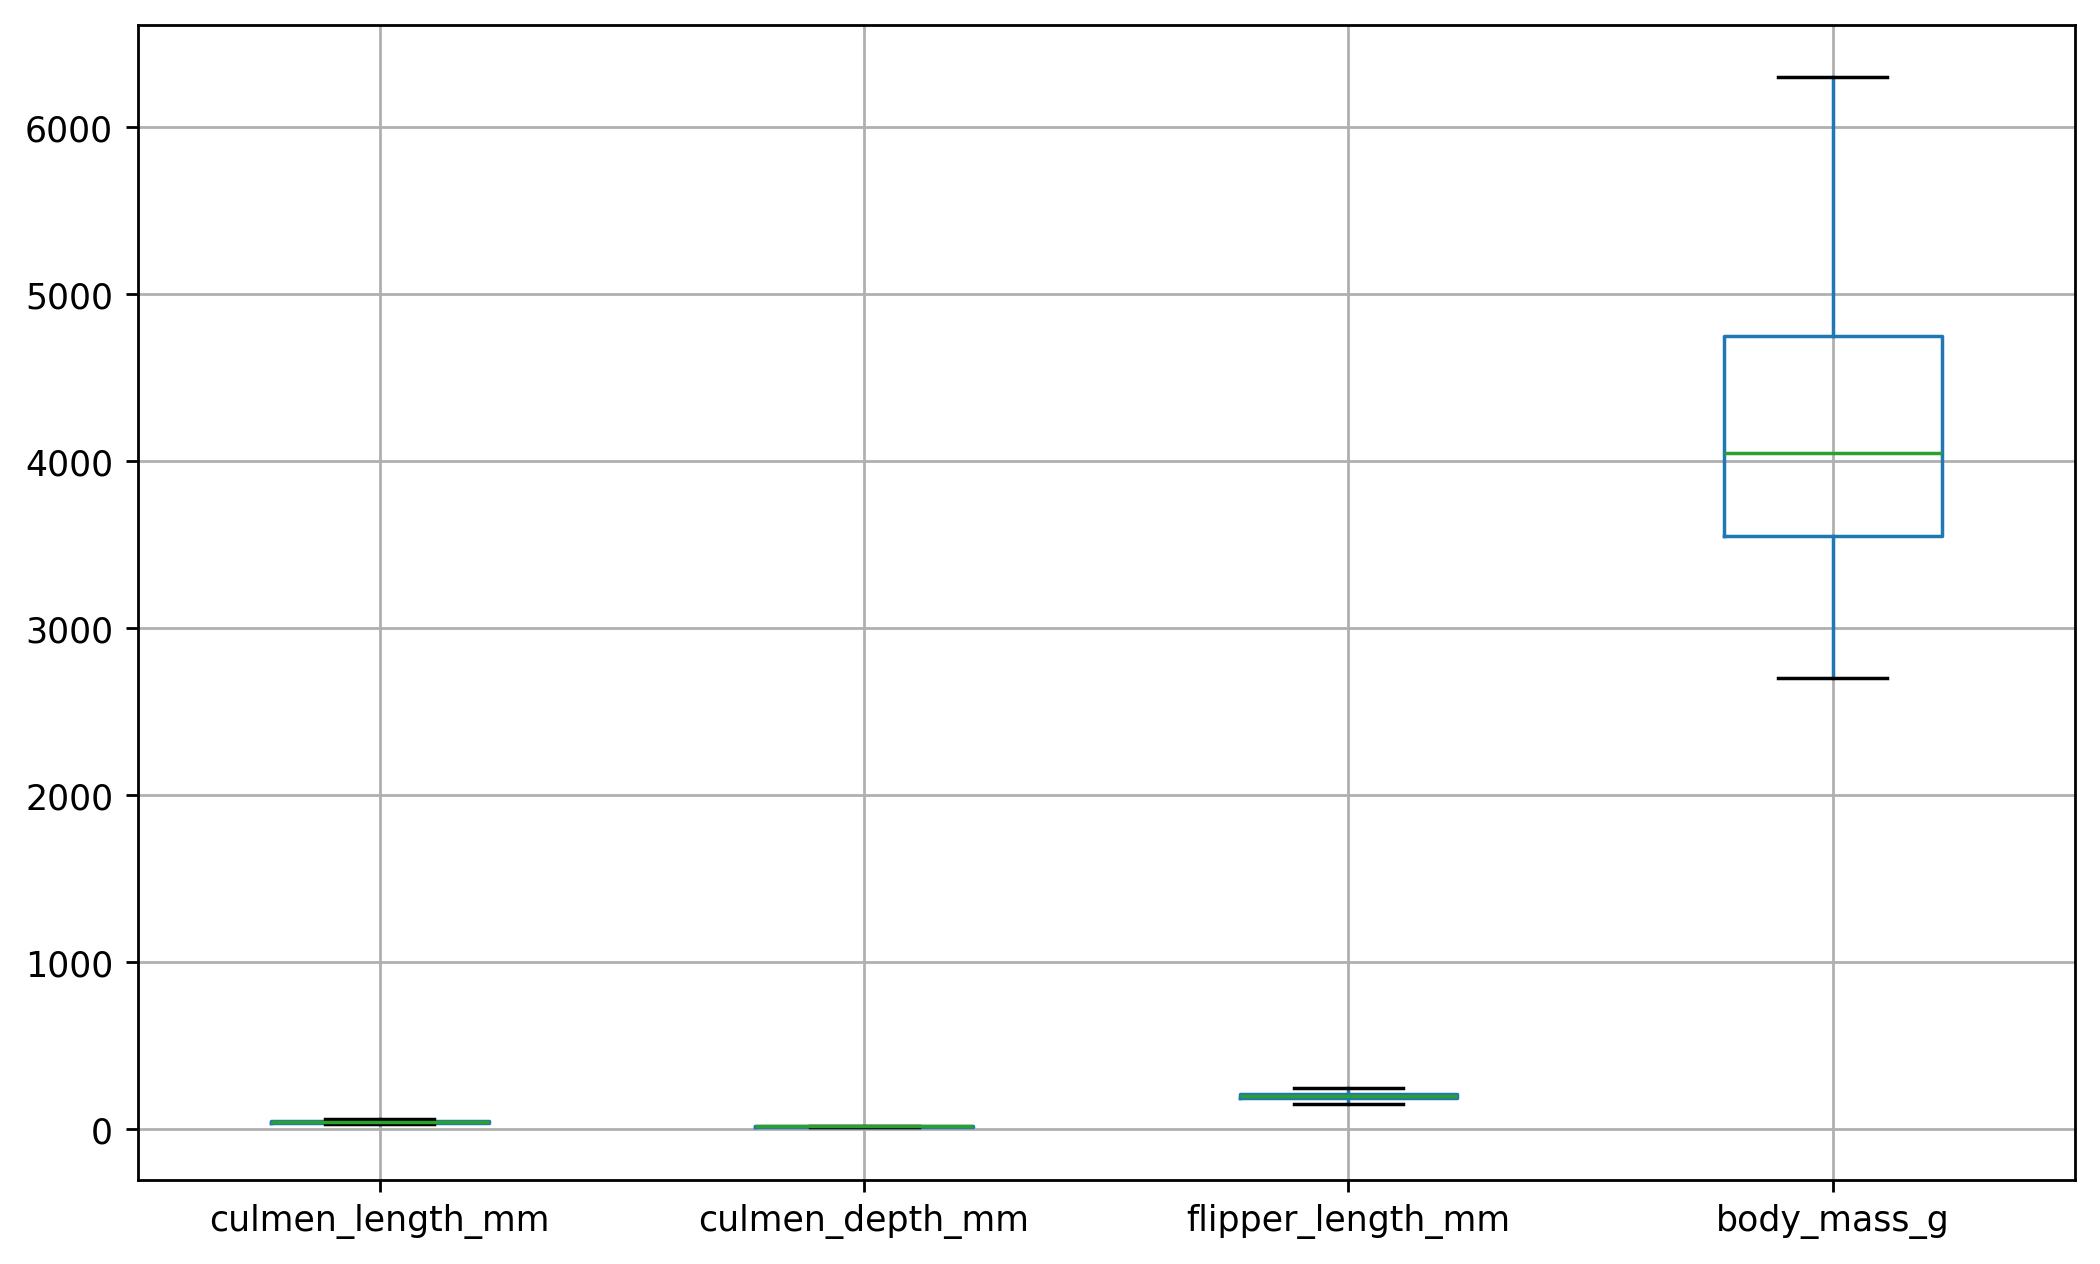

In [13]:
df.boxplot()

array([[<Axes: title={'center': 'culmen_length_mm'}>,
        <Axes: title={'center': 'culmen_depth_mm'}>],
       [<Axes: title={'center': 'flipper_length_mm'}>,
        <Axes: title={'center': 'body_mass_g'}>]], dtype=object)

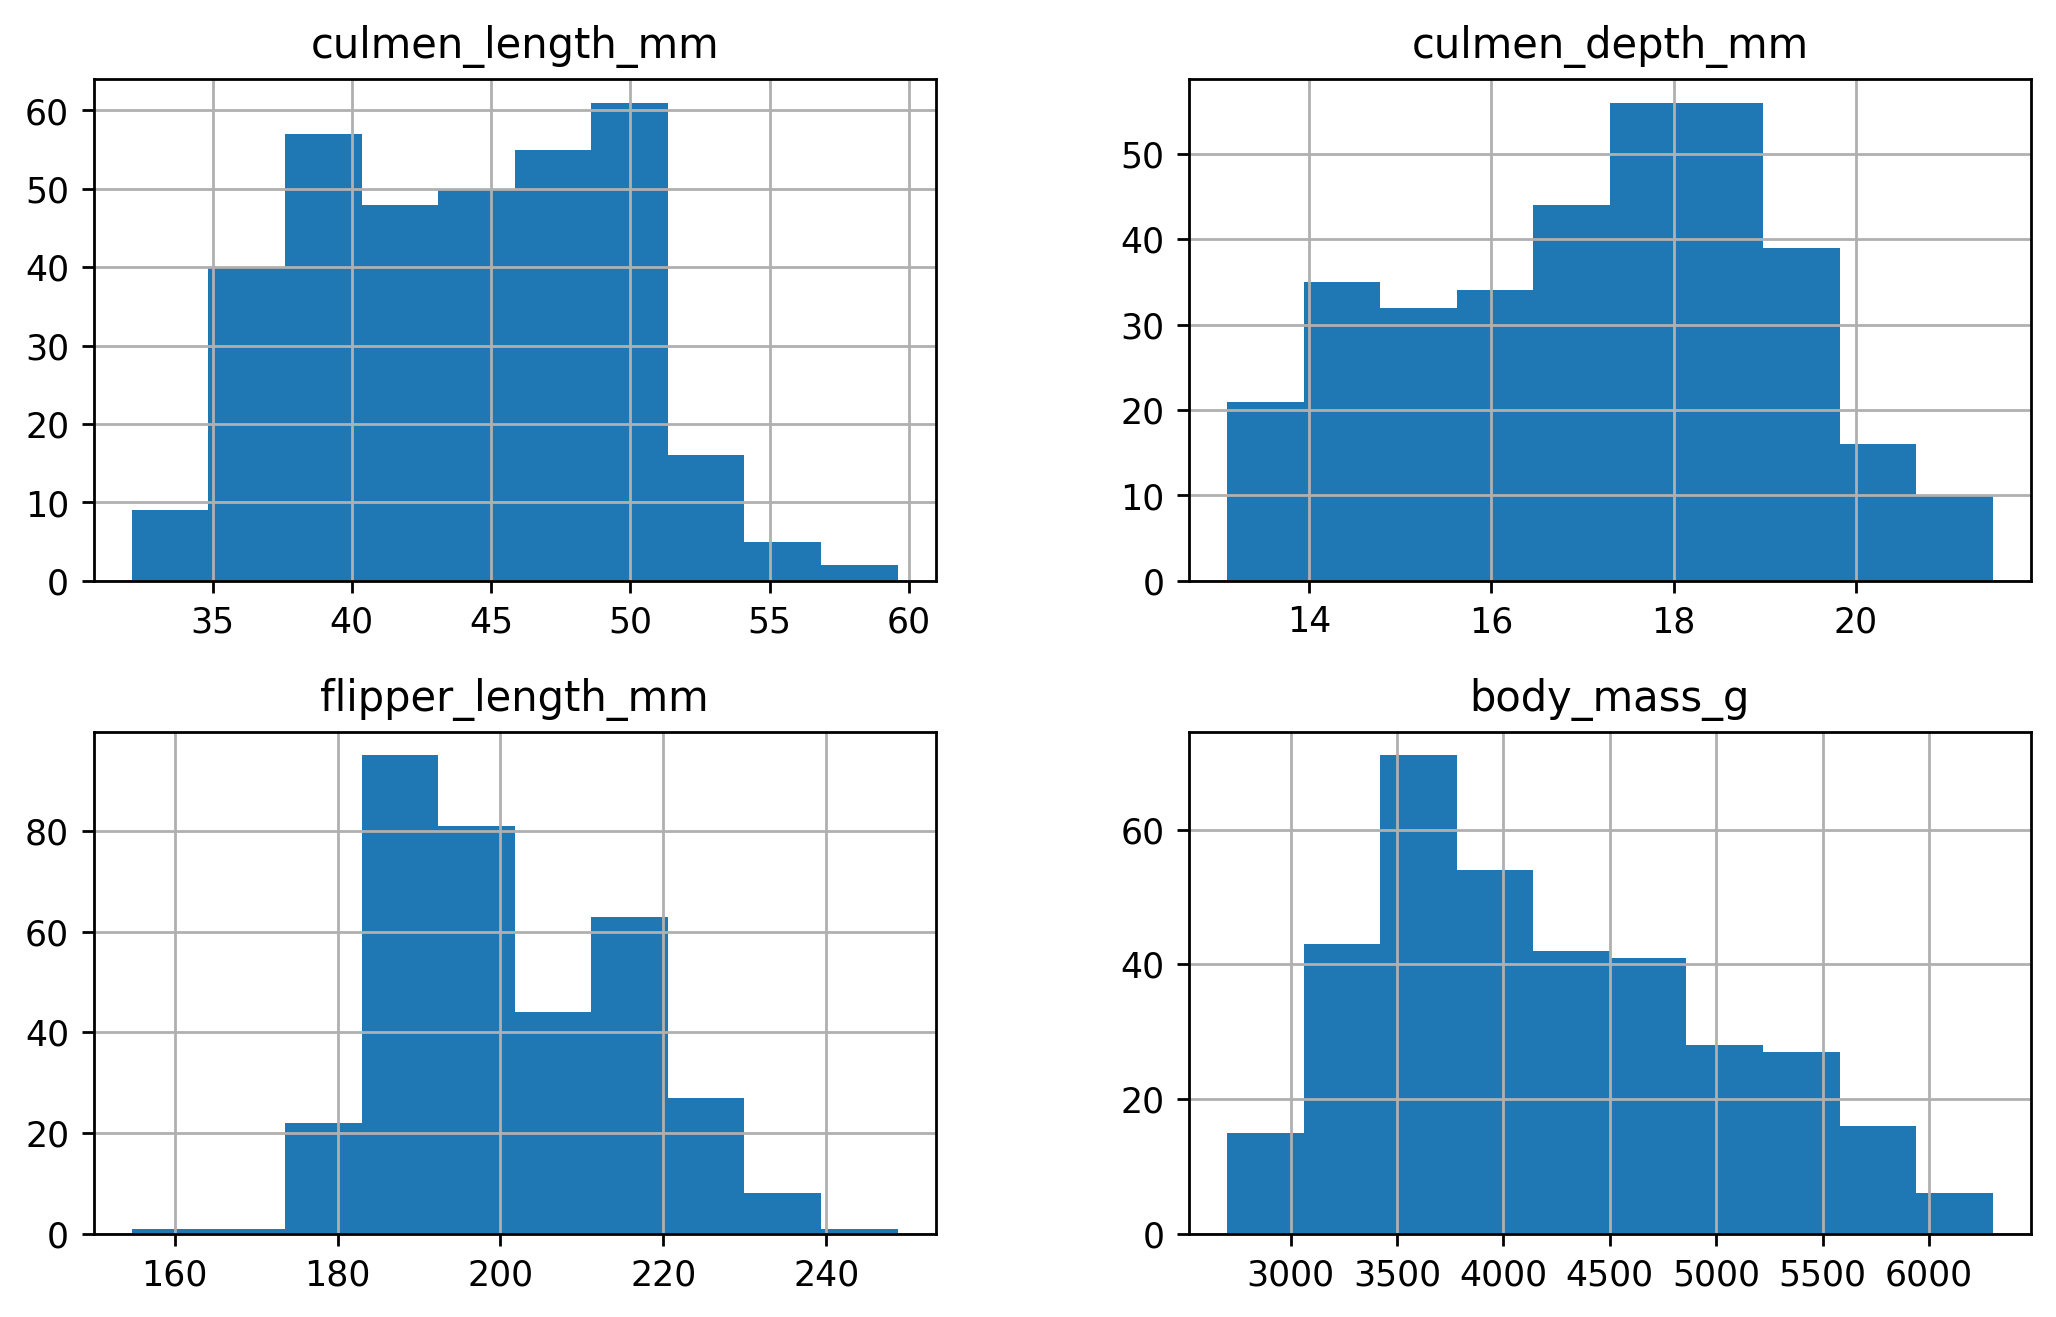

In [14]:
df.hist()

## Encoding

In [15]:
df['sex']= df['sex'].map({'MALE':0,'FEMALE':1})
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.10,18.7,181.0,3750.0,0.0
1,39.50,17.4,186.0,3800.0,1.0
2,40.30,18.0,195.0,3250.0,1.0
3,44.45,17.3,197.0,4050.0,0.0
4,36.70,19.3,193.0,3450.0,1.0
...,...,...,...,...,...
338,47.20,13.7,214.0,4925.0,1.0
340,46.80,14.3,215.0,4850.0,1.0
341,50.40,15.7,222.0,5750.0,0.0
342,45.20,14.8,212.0,5200.0,1.0


## Scaling

In [16]:
sc = StandardScaler()
num_col = df.select_dtypes(include=['int64','float64']).columns
df[num_col]=sc.fit_transform(df[num_col])
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.886062,0.786370,-1.379455,-0.564383,-0.965507
1,-0.812582,0.126151,-1.033709,-0.501856,1.035725
2,-0.665624,0.430867,-0.411367,-1.189653,1.035725
3,0.096723,0.075365,-0.273069,-0.189222,-0.965507
4,-1.326937,1.091086,-0.549665,-0.939545,1.035725
...,...,...,...,...,...
338,0.601892,-1.752934,0.902467,0.905000,1.035725
340,0.528413,-1.448217,0.971616,0.811210,1.035725
341,1.189726,-0.737212,1.455660,1.936695,-0.965507
342,0.234496,-1.194287,0.764169,1.248899,1.035725


In [17]:
df=df.dropna()

## Elbow Graph for finding k value

In [18]:
wcss =[]
for i in range (1,10):
    km = KMeans(n_clusters=i)
    km.fit_predict(df)
    wcss.append(km.inertia_)

wcss

[1711.4963304551,
 923.2942702612784,
 619.4960968095438,
 427.77452184724723,
 356.2094928584095,
 253.02973105776485,
 243.83670752906232,
 224.3289051064105,
 204.80610226100765]

Text(0, 0.5, 'WCSS')

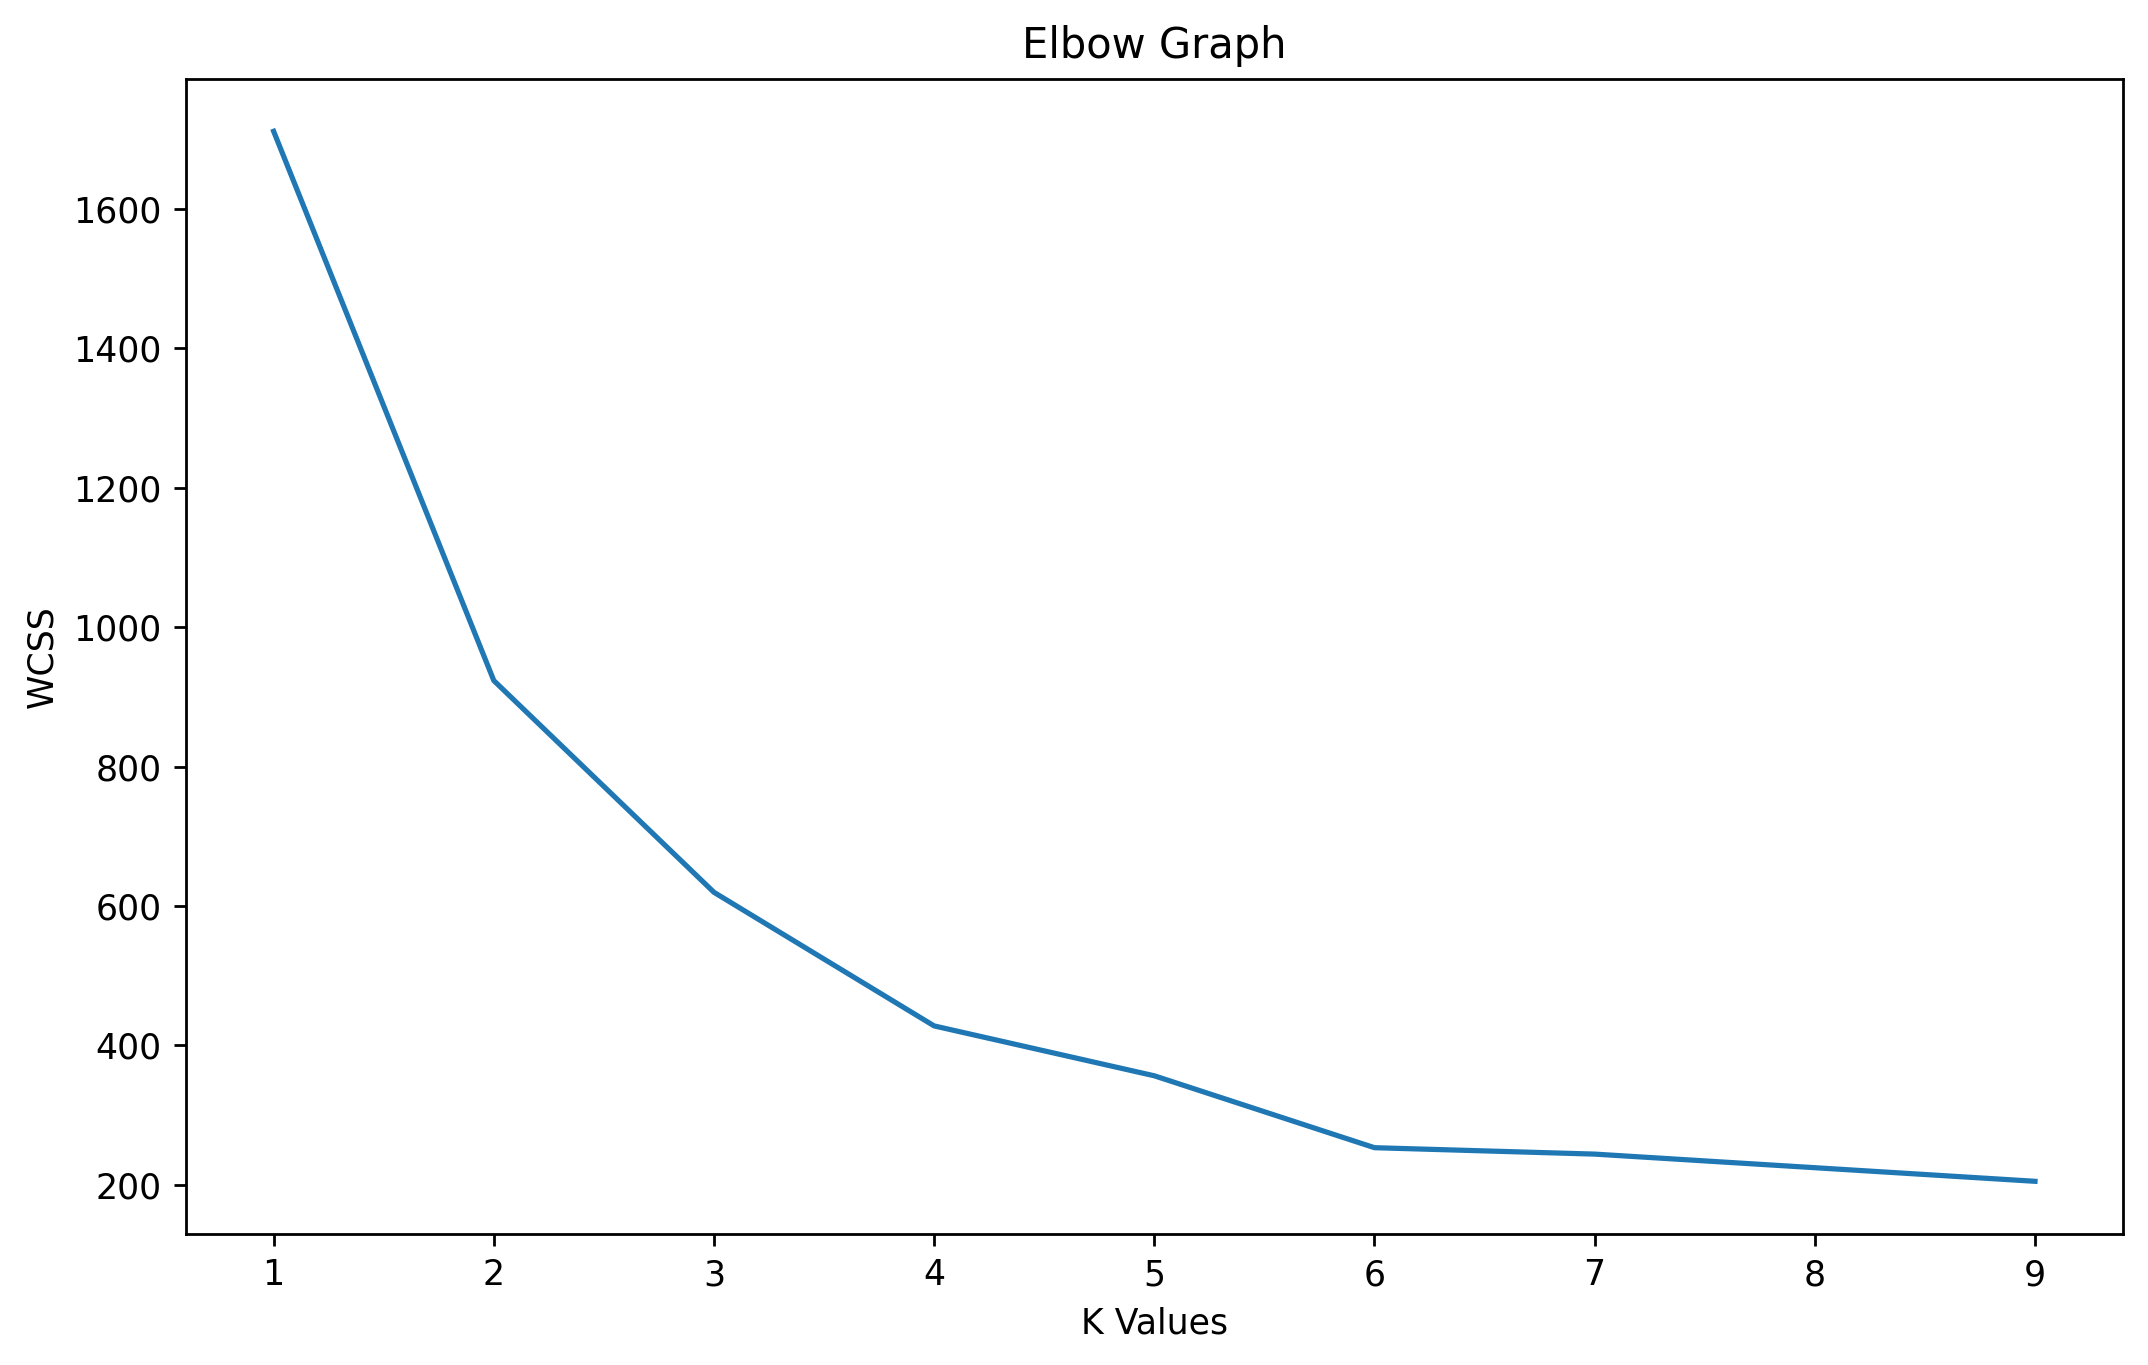

In [19]:
plt.plot(range(1,10),wcss)
plt.title("Elbow Graph")
plt.xlabel("K Values")
plt.ylabel("WCSS")

## Model Building

In [23]:
km = KMeans(n_clusters=6)
yp = km.fit_predict(df)
yp

array([1, 0, 0, 1, 0, 1, 0, 1, 1, 2, 1, 1, 0, 1, 1, 0, 0, 1, 0, 4, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 4, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 5, 4,
       4, 5, 4, 5, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 5, 4, 0, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 0, 4, 5, 4, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5, 5, 4,
       5, 4, 4, 5, 5, 4, 5, 4, 5, 4, 5, 4, 4, 5, 4, 5, 5, 4, 5, 4, 4, 5,
       3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3,

## Evaluation

In [24]:
silhouette_score(df,yp)

0.5816746524889232

In [25]:
df['cluster']=yp
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,-0.886062,0.786370,-1.379455,-0.564383,-0.965507,1
1,-0.812582,0.126151,-1.033709,-0.501856,1.035725,0
2,-0.665624,0.430867,-0.411367,-1.189653,1.035725,0
3,0.096723,0.075365,-0.273069,-0.189222,-0.965507,1
4,-1.326937,1.091086,-0.549665,-0.939545,1.035725,0
...,...,...,...,...,...,...
338,0.601892,-1.752934,0.902467,0.905000,1.035725,3
340,0.528413,-1.448217,0.971616,0.811210,1.035725,3
341,1.189726,-0.737212,1.455660,1.936695,-0.965507,2
342,0.234496,-1.194287,0.764169,1.248899,1.035725,3
